In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

In [4]:
# read in data
player_fps = {} # dictionary with avg and min fps and single avg and min fps
LOG_FILE = os.path.join(os.curdir, r'log\fun6.log')
with open(LOG_FILE, 'r') as fhandle:
    player_name = ''
    for line in fhandle:
        if '[OPT] (FPS)' in line:     
            #print(line)
            if 'Avg. FPS for' in line:
                start_ix = line.index('Avg. FPS for')
                start_player_ix = start_ix + len('Avg. FPS for ')
                player_name = line[start_player_ix:].split(':')[0]
                player_fps[player_name] = [[int(n) for n in (line.split(player_name + ': ')[1]).strip("\"\n[]").split(',')]]
            if 'Min. FPS for' in line:
                start_ix = line.index('Min. FPS for')
                player_fps[player_name].append([int(n) for n in (line.split(player_name + ': ')[1]).strip("\"\n[]").split(',')])
            if 'Single avg. FPS for' in line:
                player_fps[player_name].append(float((line.split(player_name + ': ')[1]).strip("\n\"")))
            if 'Single min. FPS for' in line:
                player_fps[player_name].append(float((line.split(player_name + ': ')[1]).strip("\n\"")))
                
        

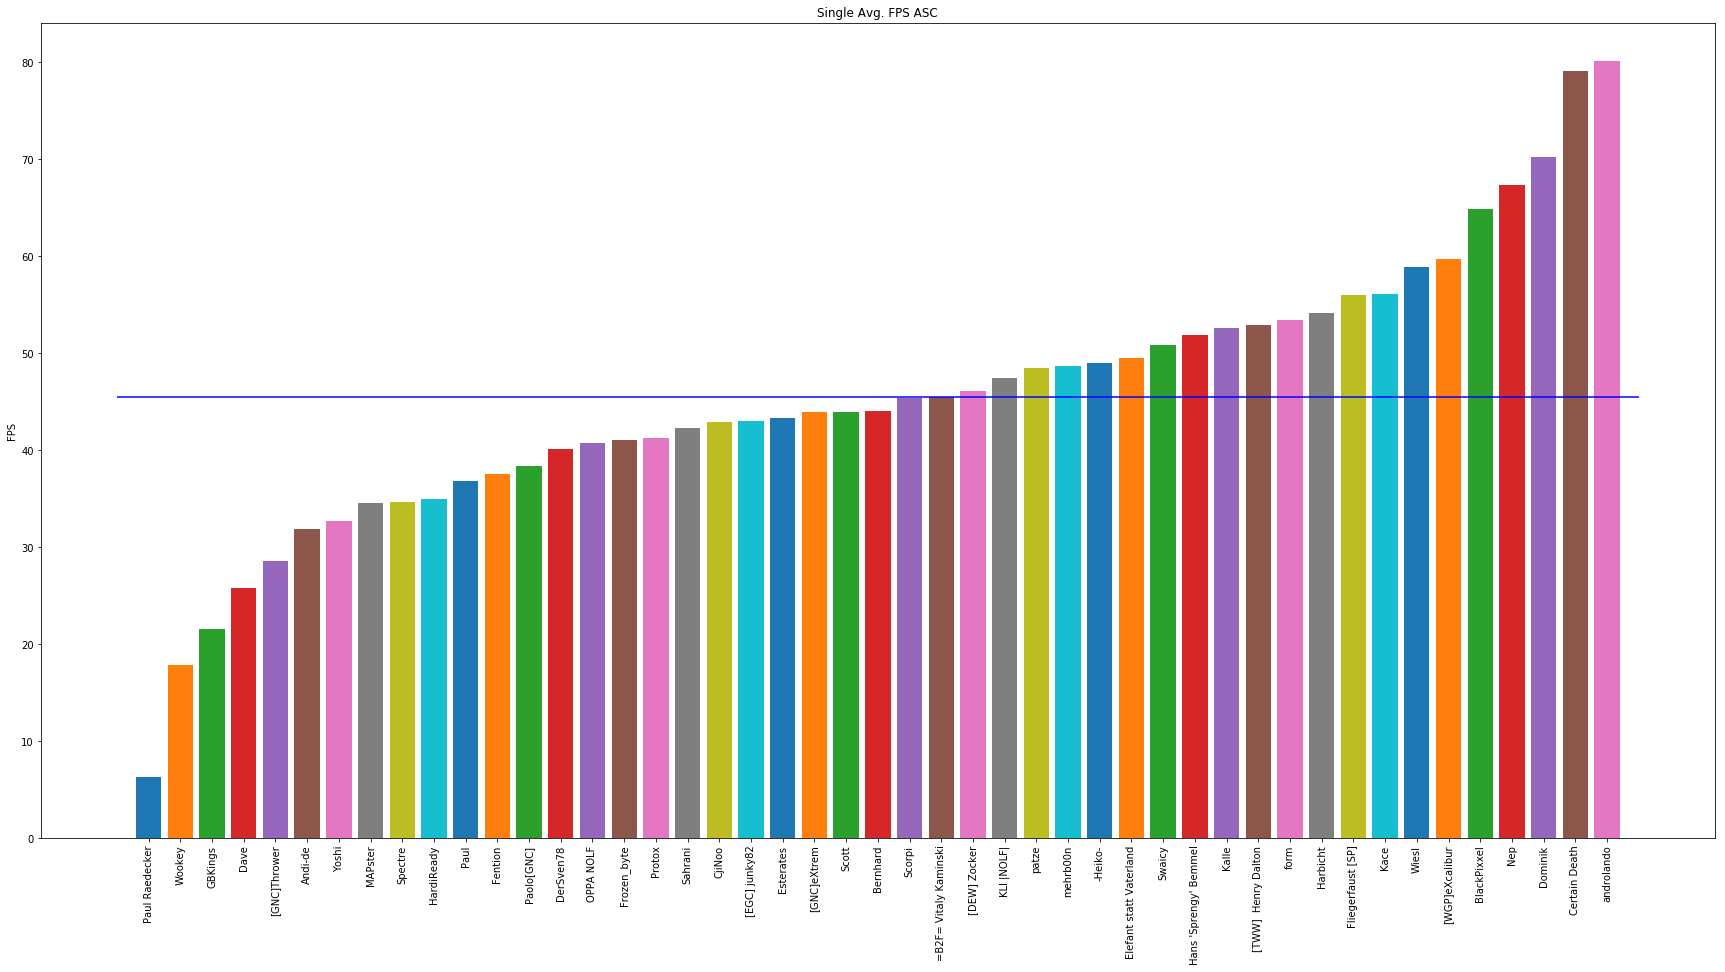

In [108]:
# plot data
col = 2
# single avg fps
fig = plt.figure(figsize=(30,15))
for name, data in sorted(player_fps.items(), key=lambda kv: kv[1][col]):
    plt.bar(name, data[col], label=name)
    plt.ylabel("FPS")
    plt.xticks(rotation=90)
    
#plt.legend(loc="right")
plt.title("Single Avg. FPS ASC")
plt.hlines(np.mean([x[col] for x in player_fps.values()]), -1, len(player_fps), color="blue")
plt.savefig(os.path.join(os.curdir, "output\single_avg_fps.png"))

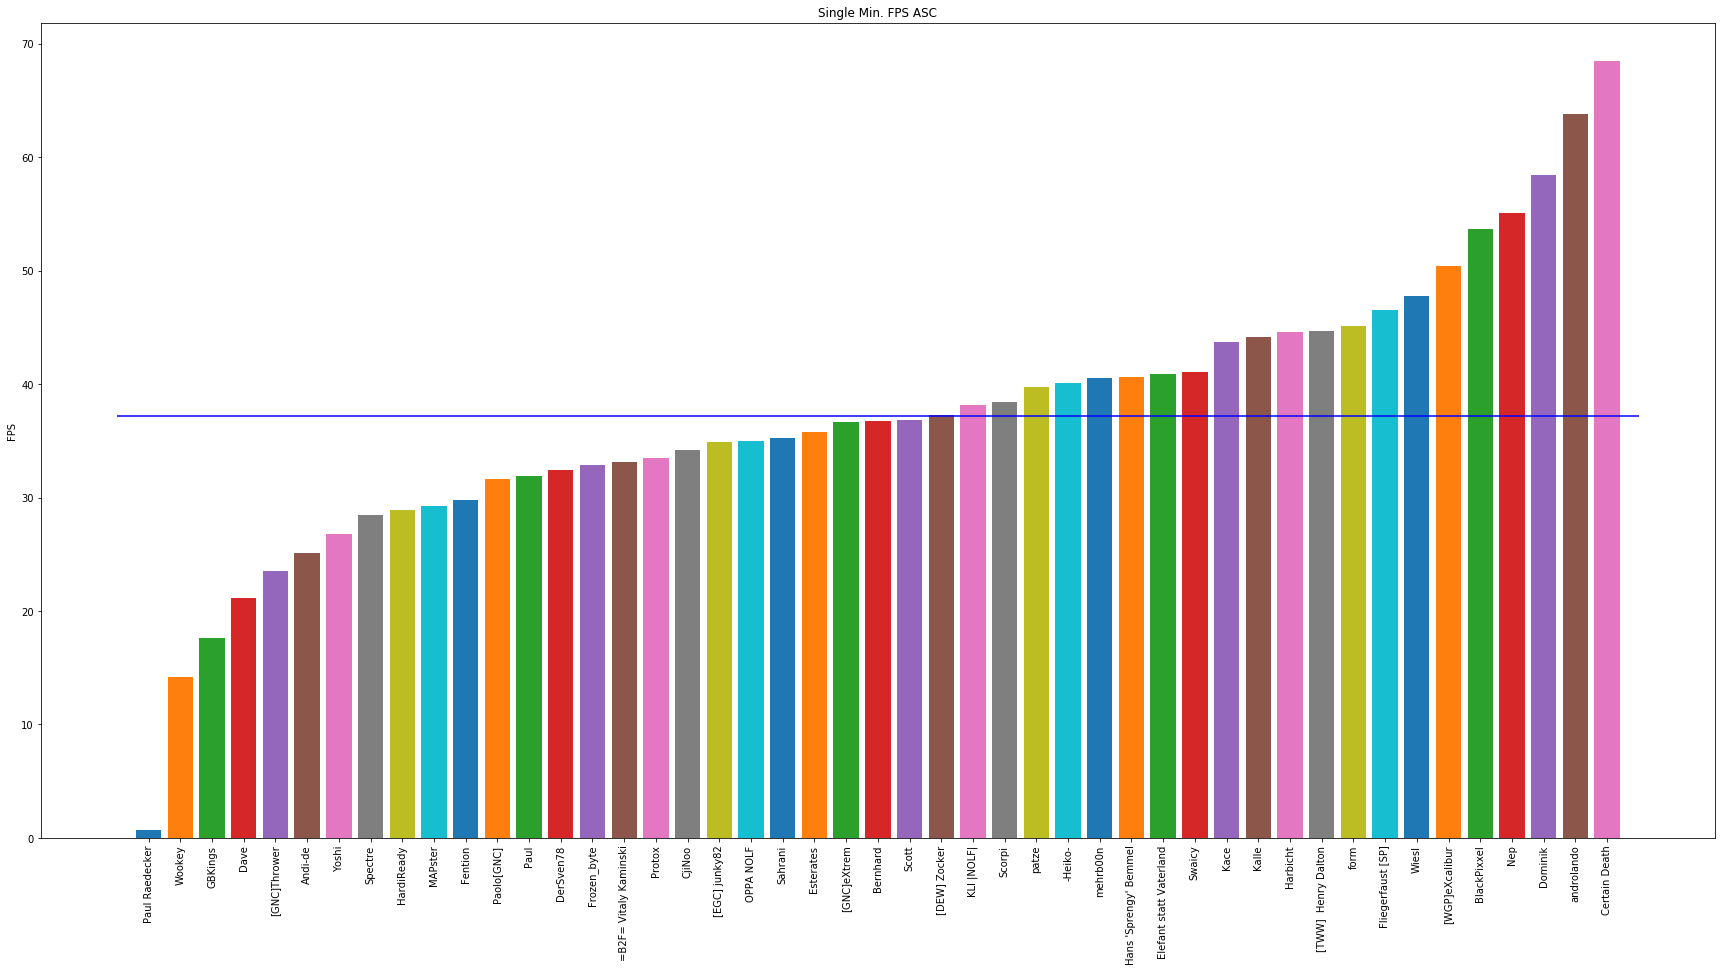

In [110]:
# plot data
col = 3
# single min fps
fig = plt.figure(figsize=(30,15))
for name, data in sorted(player_fps.items(), key=lambda kv: kv[1][col]):
    plt.bar(name, data[col], label=name)
    plt.ylabel("FPS")
    plt.xticks(rotation=90)
    
#plt.legend(loc="right")
plt.title("Single Min. FPS ASC")
plt.hlines(np.mean([x[col] for x in player_fps.values()]), -1, len(player_fps), color="blue")
plt.savefig(os.path.join(os.curdir, "output\single_min_fps.png"))

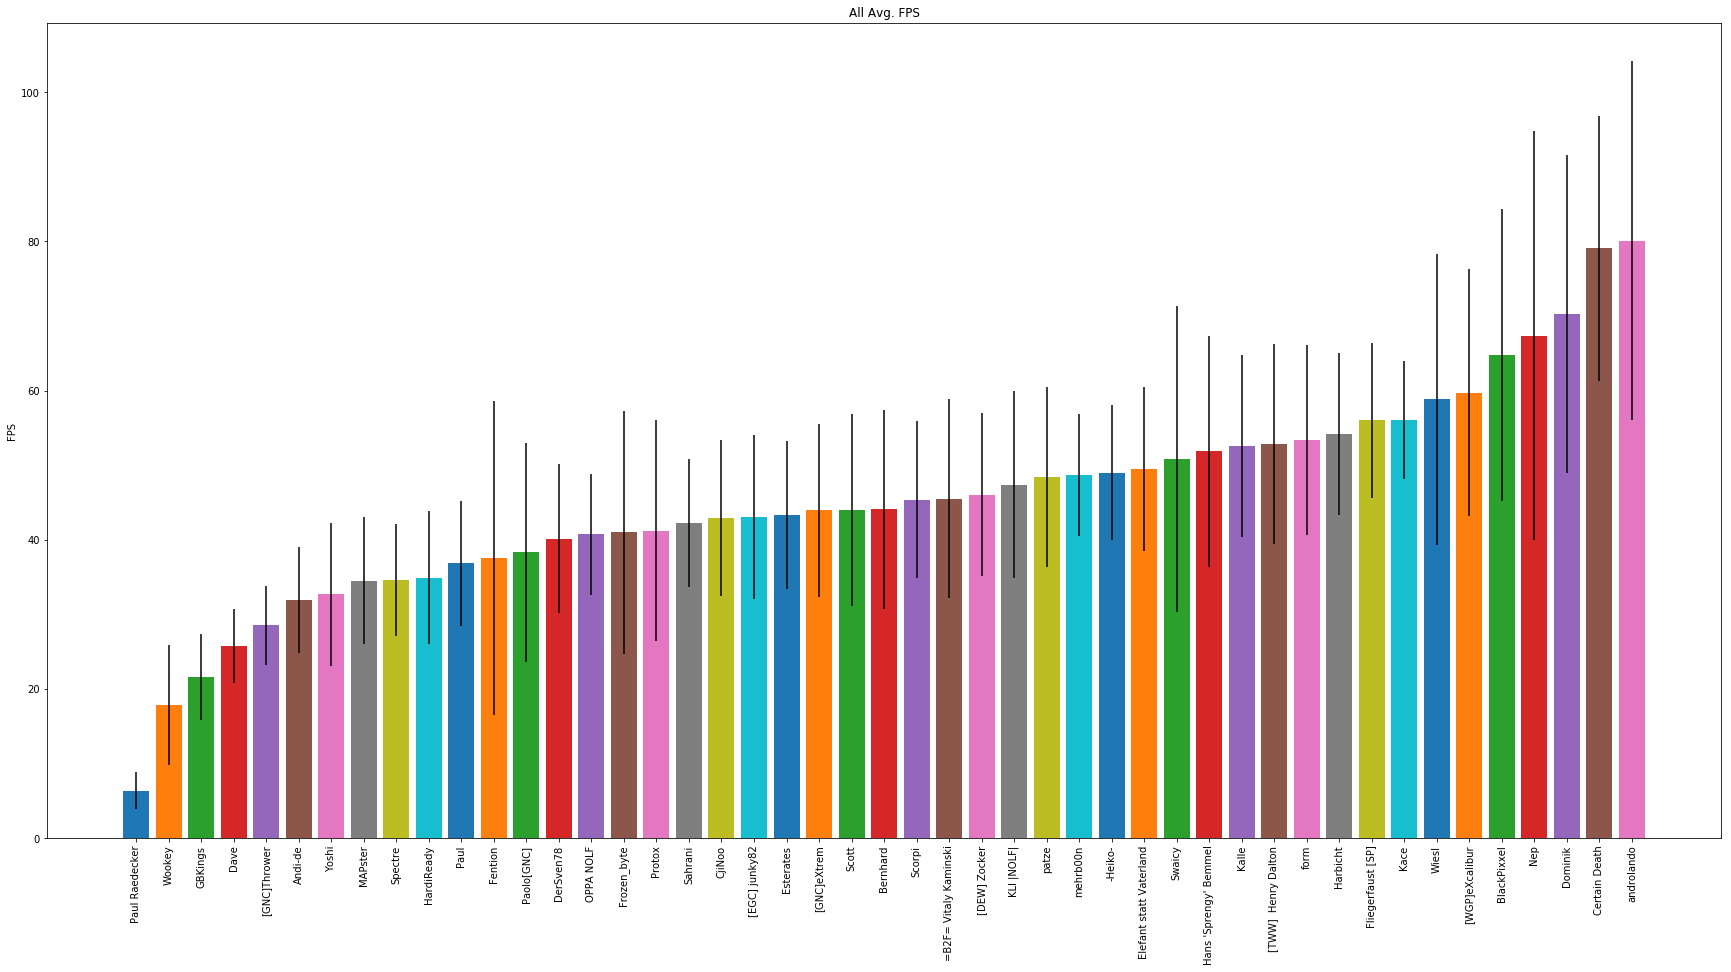

In [115]:
# plot data
col = 0
# all avg fps
fig = plt.figure(figsize=(30,15))
for name, data in sorted(player_fps.items(), key=lambda kv: np.mean(kv[1][col])):
    plt.bar(name, np.mean(data[col]), yerr=np.std(data[col]), label=name)
    plt.ylabel("FPS")
    plt.xticks(rotation=90)
    
#plt.legend(loc="right")
plt.title("All Avg. FPS")
plt.savefig(os.path.join(os.curdir, r"output\all_avg_fps.png"))

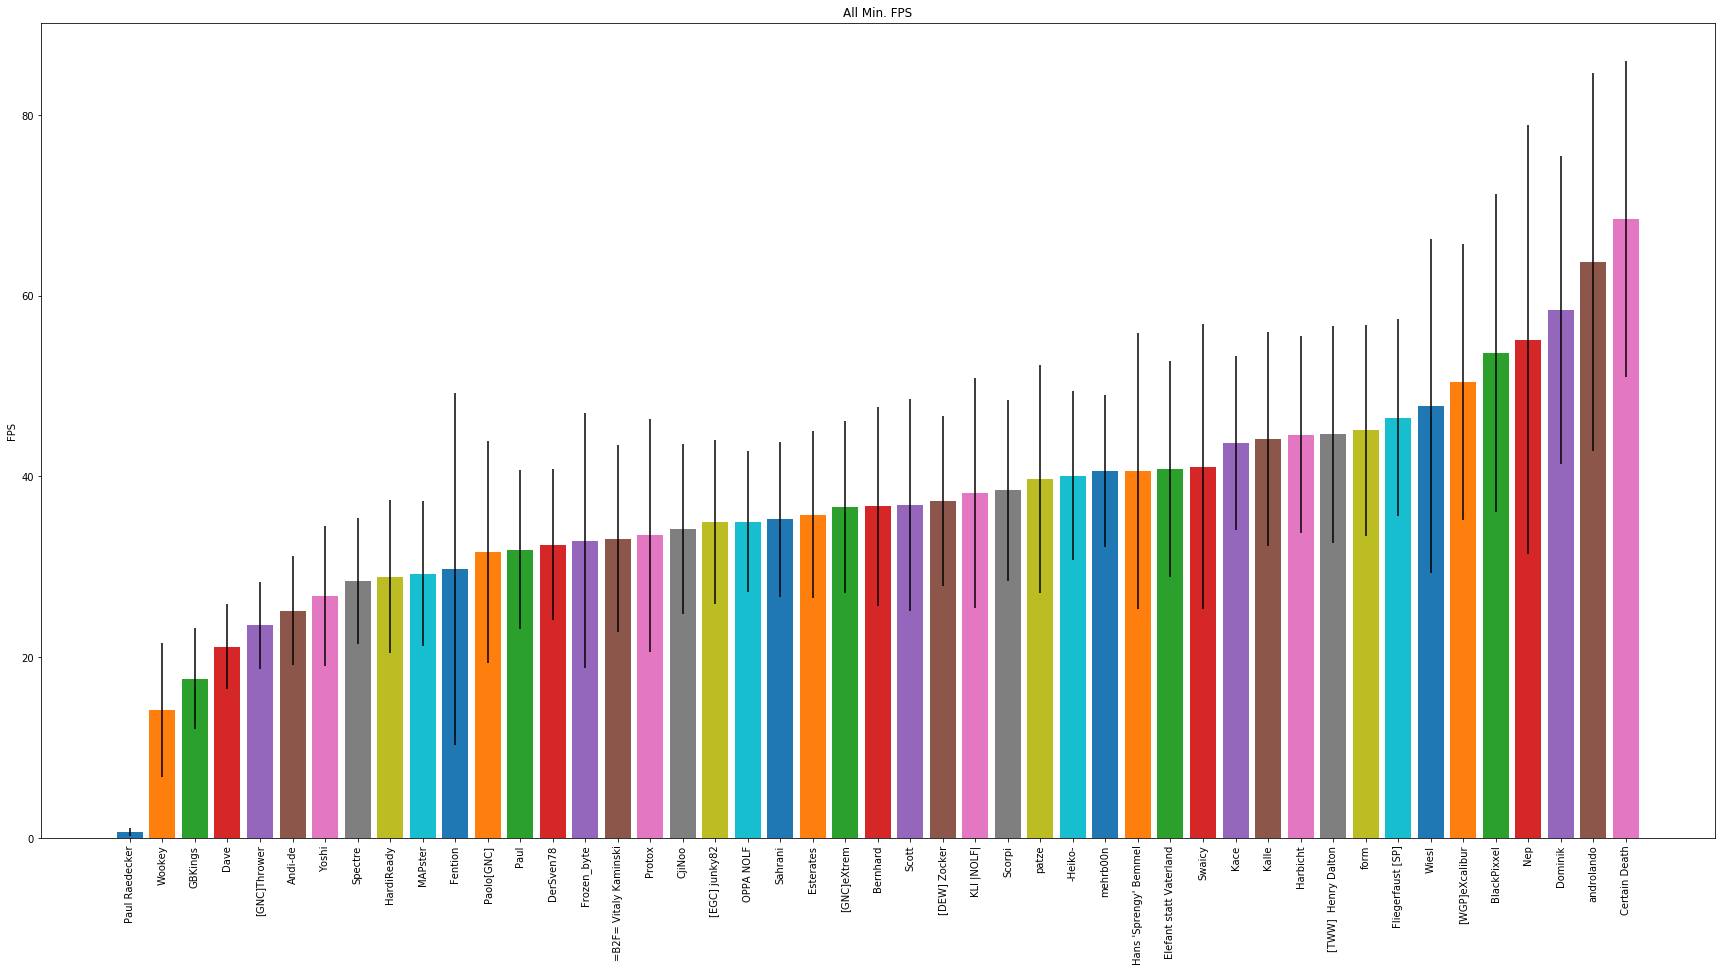

In [116]:
# plot data
col = 1
# all min fps
fig = plt.figure(figsize=(30,15))
for name, data in sorted(player_fps.items(), key=lambda kv: np.mean(kv[1][col])):
    plt.bar(name, np.mean(data[col]), yerr=np.std(data[col]), label=name)
    plt.ylabel("FPS")
    plt.xticks(rotation=90)
    
#plt.legend(loc="right")
plt.title("All Min. FPS")
plt.savefig(os.path.join(os.curdir, r'output\all_min_fps.png'))

[45.89183696 45.22083228 45.60015678 46.65121881 47.99542671 48.59969325
 49.94850647 49.47929607 49.75117636 50.20478073 50.33258046 51.13052889
 51.30397139 51.13777527 51.56004141 50.19320535 49.23273104 47.68031244
 46.74110672 45.79465462 45.14191605 46.11274233 48.71776774 50.67494824
 51.47139093 50.9378882  49.95567476 48.6691135  47.5214568  46.33568605
 46.76802183 47.97280256 47.92094862 47.4132317  47.19678148 47.2676454
 47.09015622 46.71400339 47.20694523 47.8275927  47.42744212 46.1070958
 44.83308238 44.15363992 43.74894408 44.62589161 46.14004262 47.18073802
 48.44286427 48.62431933 48.68237352 48.65038699 48.08874459 48.02144825
 46.29555293 44.27331759 42.85015742 41.33598977 40.87622983 41.56552538
 42.62170405 44.72077922 45.10655254 45.51101928 46.24429359 46.61678473
 46.4564148  46.45670996 46.53787879 47.08274301 47.09454939 47.00462416
 47.57811885 47.2768595  46.80627706 45.95365998 45.71713892 46.22195986
 46.04378198 44.82898602 44.40683717 43.64236063 43.0

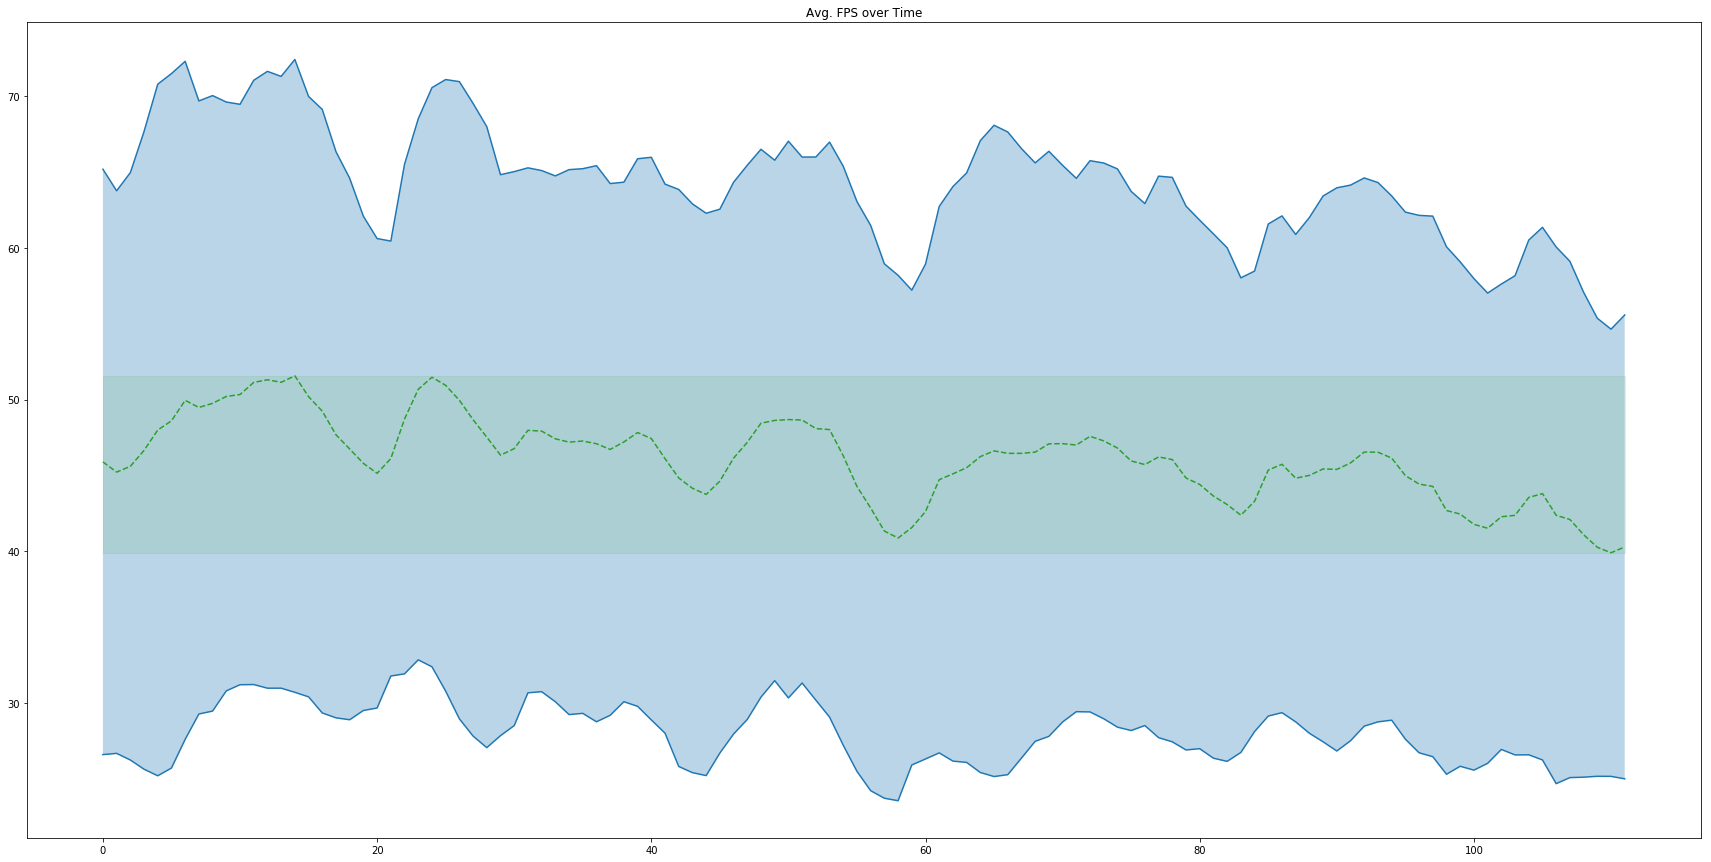

In [98]:
# plot data
from scipy import signal
col = 0

max_nr_fps = np.max([len(x[col]) for x in player_fps.values()])
M = np.empty((len(player_fps), max_nr_fps))
M[:] = np.nan
for i, kv in enumerate(player_fps.items()):
    name, data = kv
    x = data[col]
    M[i, 0:len(x)] = x

# all avg fps over time
degree = 3
window_length = 9
fig = plt.figure(figsize=(30,15))
y1 = signal.savgol_filter(np.nanmean(M, 0) - np.nanstd(M, 0), window_length, degree)
y2 = signal.savgol_filter(np.nanmean(M, 0) + np.nanstd(M, 0), window_length, degree)
y = signal.savgol_filter(np.nanmean(M, 0), window_length, degree)
print(y)

xx = range(max_nr_fps)
plt.fill_between(x=xx, y1=y1, y2=y2, alpha=0.3)
plt.plot(xx, y1, color="C0")
plt.plot(xx, y2, color="C0")
plt.plot(xx, y, "--", color="C2")
plt.fill_between(xx, y1=np.repeat(np.min(y), max_nr_fps), y2=np.repeat(np.max(y), max_nr_fps), alpha=0.1, color="C2")
#plt.legend(loc="right")
plt.title("Avg. FPS over Time")
plt.savefig(os.path.join(os.curdir, r'output\all_avg_fps_over_time.png'))

[35.80523552 35.8836772  36.52317145 37.50785708 38.62187289 39.16372326
 40.35788572 40.4496518  40.69377    40.67438359 40.86128364 41.21654433
 41.44993412 41.72708451 42.49538867 41.85620177 41.01741013 39.14106908
 38.2505176  36.86693017 36.31724073 37.62224732 39.92772445 41.88725767
 42.66083192 41.92904197 41.16450216 39.90871447 38.83549784 37.85234331
 38.07895727 39.3661773  39.56587615 39.30735931 38.92198381 38.8190288
 38.52155091 38.26246941 38.87831733 39.31018257 39.23800113 38.3169584
 36.83280632 36.3023339  36.10904538 37.27698156 38.89554152 39.48981382
 40.54052752 40.42626519 40.11240763 40.1033189  39.60360094 39.78551751
 38.20680834 36.47274695 35.229634   33.60478158 33.0821527  34.0639512
 34.69077135 36.34602519 36.16902794 36.58333333 37.17778434 37.66971665
 37.67581661 38.03354978 38.18654073 39.25600157 39.25127902 39.36826053
 39.89767808 39.75974026 39.14325069 38.50442739 38.39964581 38.87180244
 38.360488   37.28467093 36.87080256 36.00878843 35.39

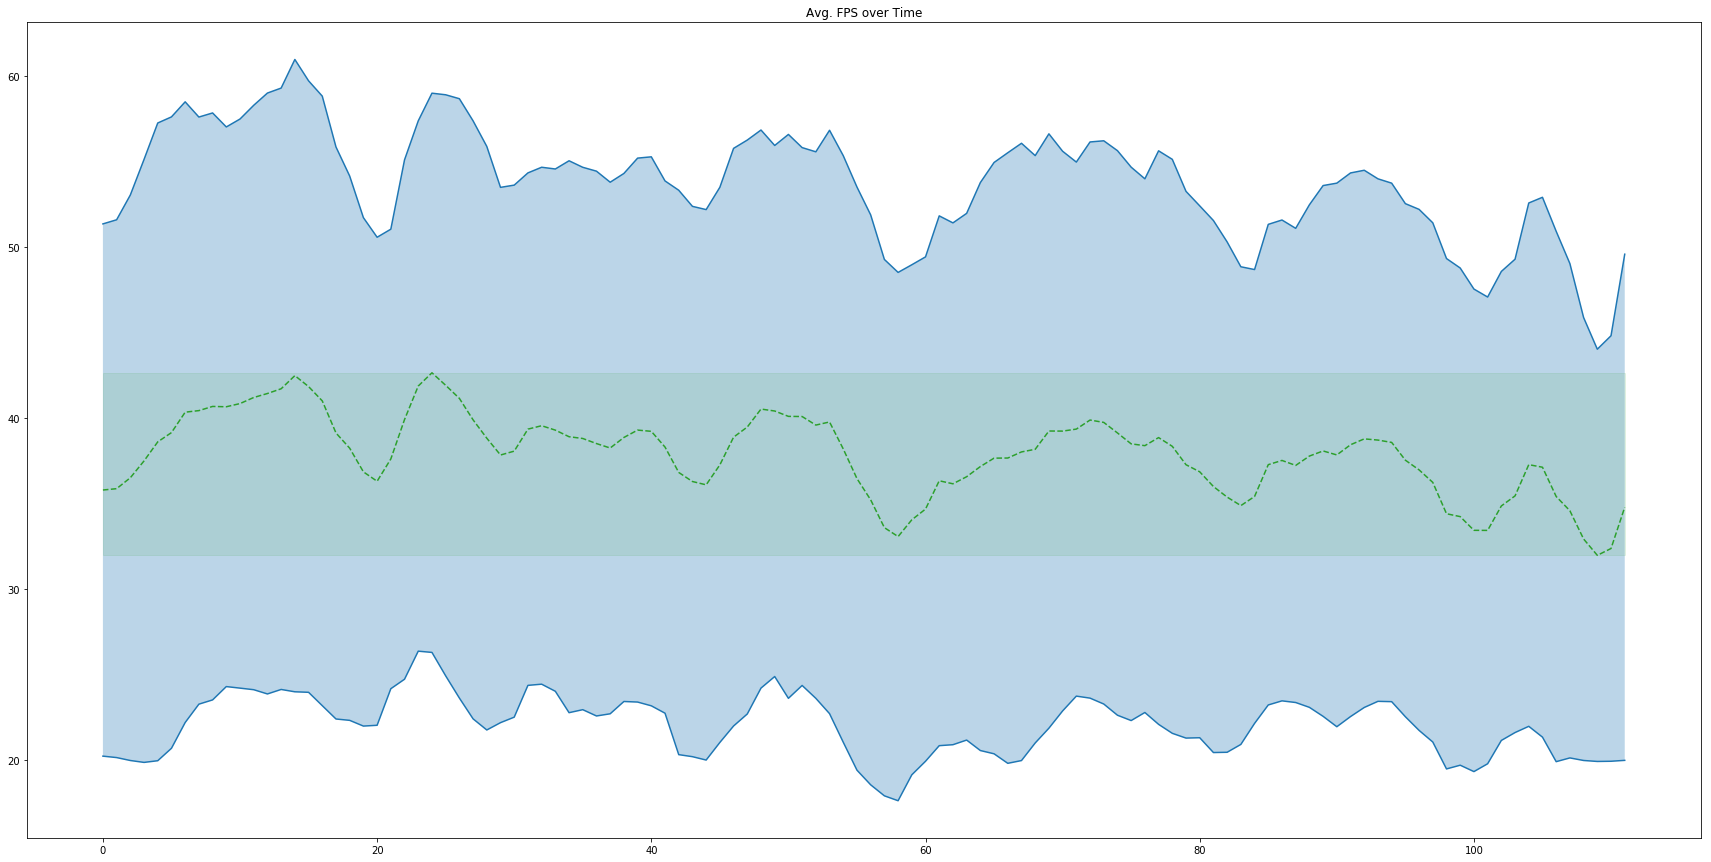

In [100]:
# plot data
from scipy import signal
col = 1

max_nr_fps = np.max([len(x[col]) for x in player_fps.values()])
M = np.empty((len(player_fps), max_nr_fps))
M[:] = np.nan
for i, kv in enumerate(player_fps.items()):
    name, data = kv
    x = data[col]
    M[i, 0:len(x)] = x

# all avg fps over time
degree = 3
window_length = 9
fig = plt.figure(figsize=(30,15))
y1 = signal.savgol_filter(np.nanmean(M, 0) - np.nanstd(M, 0), window_length, degree)
y2 = signal.savgol_filter(np.nanmean(M, 0) + np.nanstd(M, 0), window_length, degree)
y = signal.savgol_filter(np.nanmean(M, 0), window_length, degree)
print(y)

xx = range(max_nr_fps)
plt.fill_between(x=xx, y1=y1, y2=y2, alpha=0.3)
plt.plot(xx, y1, color="C0")
plt.plot(xx, y2, color="C0")
plt.plot(xx, y, "--", color="C2")
plt.fill_between(xx, y1=np.repeat(np.min(y), max_nr_fps), y2=np.repeat(np.max(y), max_nr_fps), alpha=0.1, color="C2")
#plt.legend(loc="right")
plt.title("Avg. FPS over Time")
plt.savefig(os.path.join(os.curdir, r'output\all_min_fps_over_time.png'))